In [1]:
import pandas as pd
import os
import numpy as np

from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

os.chdir("D:/WorkPath/PycharmProjects/MutTm-pred")
from Dataset.Process4Dataset.DatasetCeator4PonDT import Dataset4MutTm
from MachineLearning.Util import train_validation_test, train_test, test

# 650M

In [2]:
dataset = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=50,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="add")

train_feature = np.array(dataset.train_feature_set)
train_label = np.array(dataset.train_label_set).ravel()
test_feature = np.array(dataset.test_feature_set)
test_leabel = np.array(dataset.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、测试集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了15条非法长度的数据，当前蛋白质长度被限制在(50, 5000)
-删除条875个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了0条非法长度的数据，当前蛋白质长度被限制在(50, 5000)
-删除条16个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.494685649871826
-释放模型后显存用量: 0.008752822875976562
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.008752822875976562
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 344/344 [00:00<00:00, 9955.77it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


# 3B

In [3]:
# dataset = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
#                           train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
#                           test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
#                           training_version="PonDB_withpHTm",
#                           testing_version="ProThermDBTest_withpHTm",
#                           selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
#                           features=["neighbor", "aaindex", "group", "param", "GO",
#                                     "rpm", "hydrop", "context_embedding"],
#                           context_length=200,
#                           embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t36_3B_UR50D",
#                           embedding_model_name="ESM-2-3B",
#                           embedding_method="add")
# 
# train_feature = np.array(dataset.train_feature_set)
# train_label = np.array(dataset.train_label_set).ravel()
# test_feature = np.array(dataset.test_feature_set)
# test_leabel = np.array(dataset.test_label_set).ravel()

In [3]:
xgb_rfe = RFE(XGBRegressor(max_depth=23,
                        min_child_weight=7,
                        gamma=0.67,
                        subsample=0.83,
                        colsample_bytree=0.93,
                        alpha=0.0175),
                 n_features_to_select=200,
                 step=50,
                 verbose=False)
xgb_rfe.fit(train_feature, train_label)

RFE(estimator=XGBRegressor(alpha=0.0175, base_score=None, booster=None,
                           callbacks=None, colsample_bylevel=None,
                           colsample_bynode=None, colsample_bytree=0.93,
                           device=None, early_stopping_rounds=None,
                           enable_categorical=False, eval_metric=None,
                           feature_types=None, gamma=0.67, grow_policy=None,
                           importance_type=None, interaction_constraints=None,
                           learning_rate=None, max_bin=None,
                           max_cat_threshold=None, max_cat_to_onehot=None,
                           max_delta_step=None, max_depth=23, max_leaves=None,
                           min_child_weight=7, missing=nan,
                           monotone_constraints=None, multi_strategy=None,
                           n_estimators=None, n_jobs=None,
                           num_parallel_tree=None, ...),
    n_features_to_select=200, step=50, verbose=False)

In [4]:
best_model = XGBRegressor(max_depth=23,
                         min_child_weight=7,
                         gamma=0.67,
                         subsample=0.83,
                         colsample_bytree=0.93,
                         alpha=0.0175)
best_model.fit(xgb_rfe.transform(train_feature), train_label)

XGBRegressor(alpha=0.0175, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.93, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.67, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=23, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [5]:
test(best_model,
     xgb_rfe.transform(test_feature),
     test_leabel)

Starting Testing...
The Result for Testing:MAE:3.8653
PCC:0.7081
R2:0.4978
RMSE:5.9729
Time for Testing:0.0035753250122070312


In [6]:
fetrues_importances = best_model.feature_importances_
selected_features = [dataset.train_feature_set.columns[pos] 
                     for pos in range(len(dataset.train_feature_set.columns)) 
                     if xgb_rfe.support_[pos]]

In [8]:
# importance_df = pd.DataFrame({"Feature": selected_features, "Importance": fetrues_importances})
# importance_df = importance_df.sort_values(by="Importance", ascending=False)
# (importance_df.reset_index(drop=True).to_excel
#  ("D:\OneDrive\Document\Pon-DT\Record\讨论及修改[5-18]\附件11.FeatureRank.xlsx"))
# importance_df.reset_index(drop=True)

In [7]:
y_pred = best_model.predict(xgb_rfe.transform(test_feature))
y_test = test_leabel
residuals = y_test - y_pred
abs_residuals = np.abs(residuals)

In [8]:
result = pd.concat([dataset.testing_dataset[["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"]],
                   pd.Series(y_pred),
                   pd.Series(residuals)], 
                  axis=1)
result.rename(columns={1: "Residual", 0: "Predicted"}, inplace=True)
result.insert(result.shape[1], "ABS_Residual", abs_residuals)

In [9]:
result = (result.sort_values(by=["UniProt_ID", "Mutation", "ABS_Residual"],
                             ascending=True).drop_duplicates(subset=["UniProt_ID", "Mutation"],
                                                             keep="last"))
result

,UniProt_ID,Mutation,pH,Tm,ΔTm,Predicted,Residual,ABS_Residual
0,D4Z2G1,Q210N,7.5,58.5,7.5,18.829611,-11.329611,11.329611
1,O00095,W23Y,8.0,53.4,-1.0,-5.731707,4.731707,4.731707
2,O60880,E67D,7.4,44.2,-13.6,-9.221779,-4.378221,4.378221
3,O61594,S337F,6.0,39.1,-6.9,-4.127838,-2.772162,2.772162
5,P00044,A13L,2.1,33.7,-1.7,-2.123946,0.423946,0.423946
...,...,...,...,...,...,...,...,...
339,Q9ZAG3,D50P,7.1,42.8,-6.0,-5.347010,-0.652990,0.652990
340,Q9ZAG3,E124D,7.1,50.1,1.3,-4.803782,6.103782,6.103782
341,Q9ZAG3,E45K,7.1,50.8,2.0,-2.340522,4.340522,4.340522
342,Q9ZAG3,K13P,7.1,44.8,-4.0,-0.632294,-3.367706,3.367706


In [11]:
y_test = result["ΔTm"]
y_pred = result["Predicted"]
y_residuals = result["Residual"]

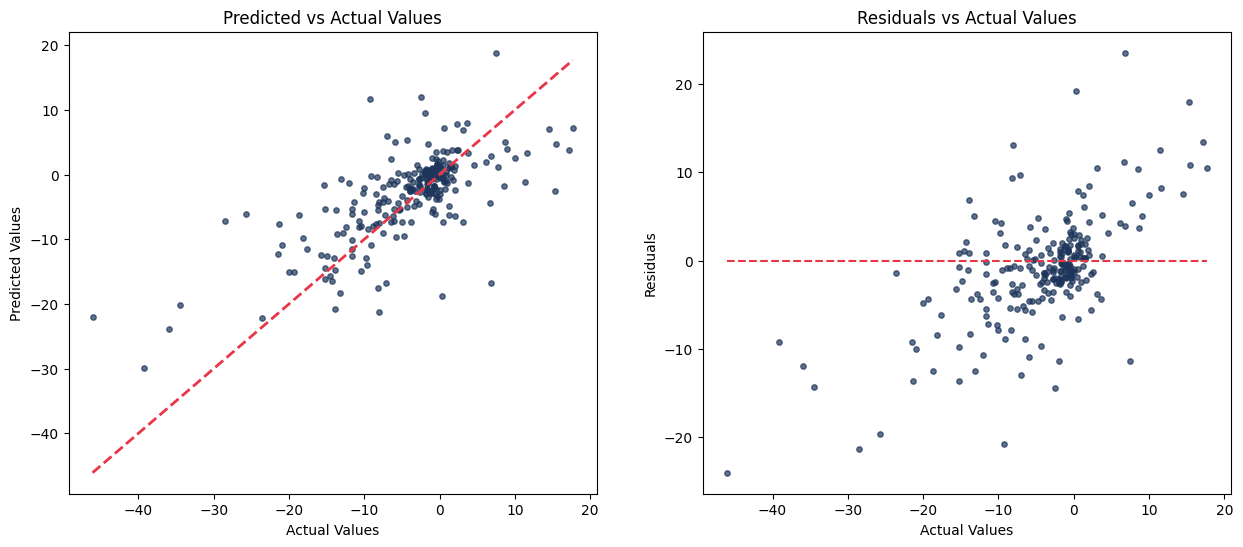

In [16]:
from matplotlib import pyplot as plt

# 绘制图形
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 子图1: 散点图
axes[0].scatter(y_test, y_pred, alpha=0.7, color="#1d355a", s=15)  # 这里设置 s=10 来减小点的大小
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="#e83647", linestyle="--", lw=2)
axes[0].set_title('Predicted vs Actual Values')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')

# 子图2: 残差图
axes[1].scatter(y_test, y_residuals, alpha=0.7, color="#1d355a", s=15)  # 这里设置 s=10 来减小点的大小
axes[1].hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors="#e83647", linestyles='dashed')
axes[1].set_title('Residuals vs Actual Values')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Residuals')

# fig.savefig("D:\OneDrive\Document\Pon-DT\Record\讨论及修改[5-18]\附件11.预测散点及残差图.png", dpi=600)
plt.show()

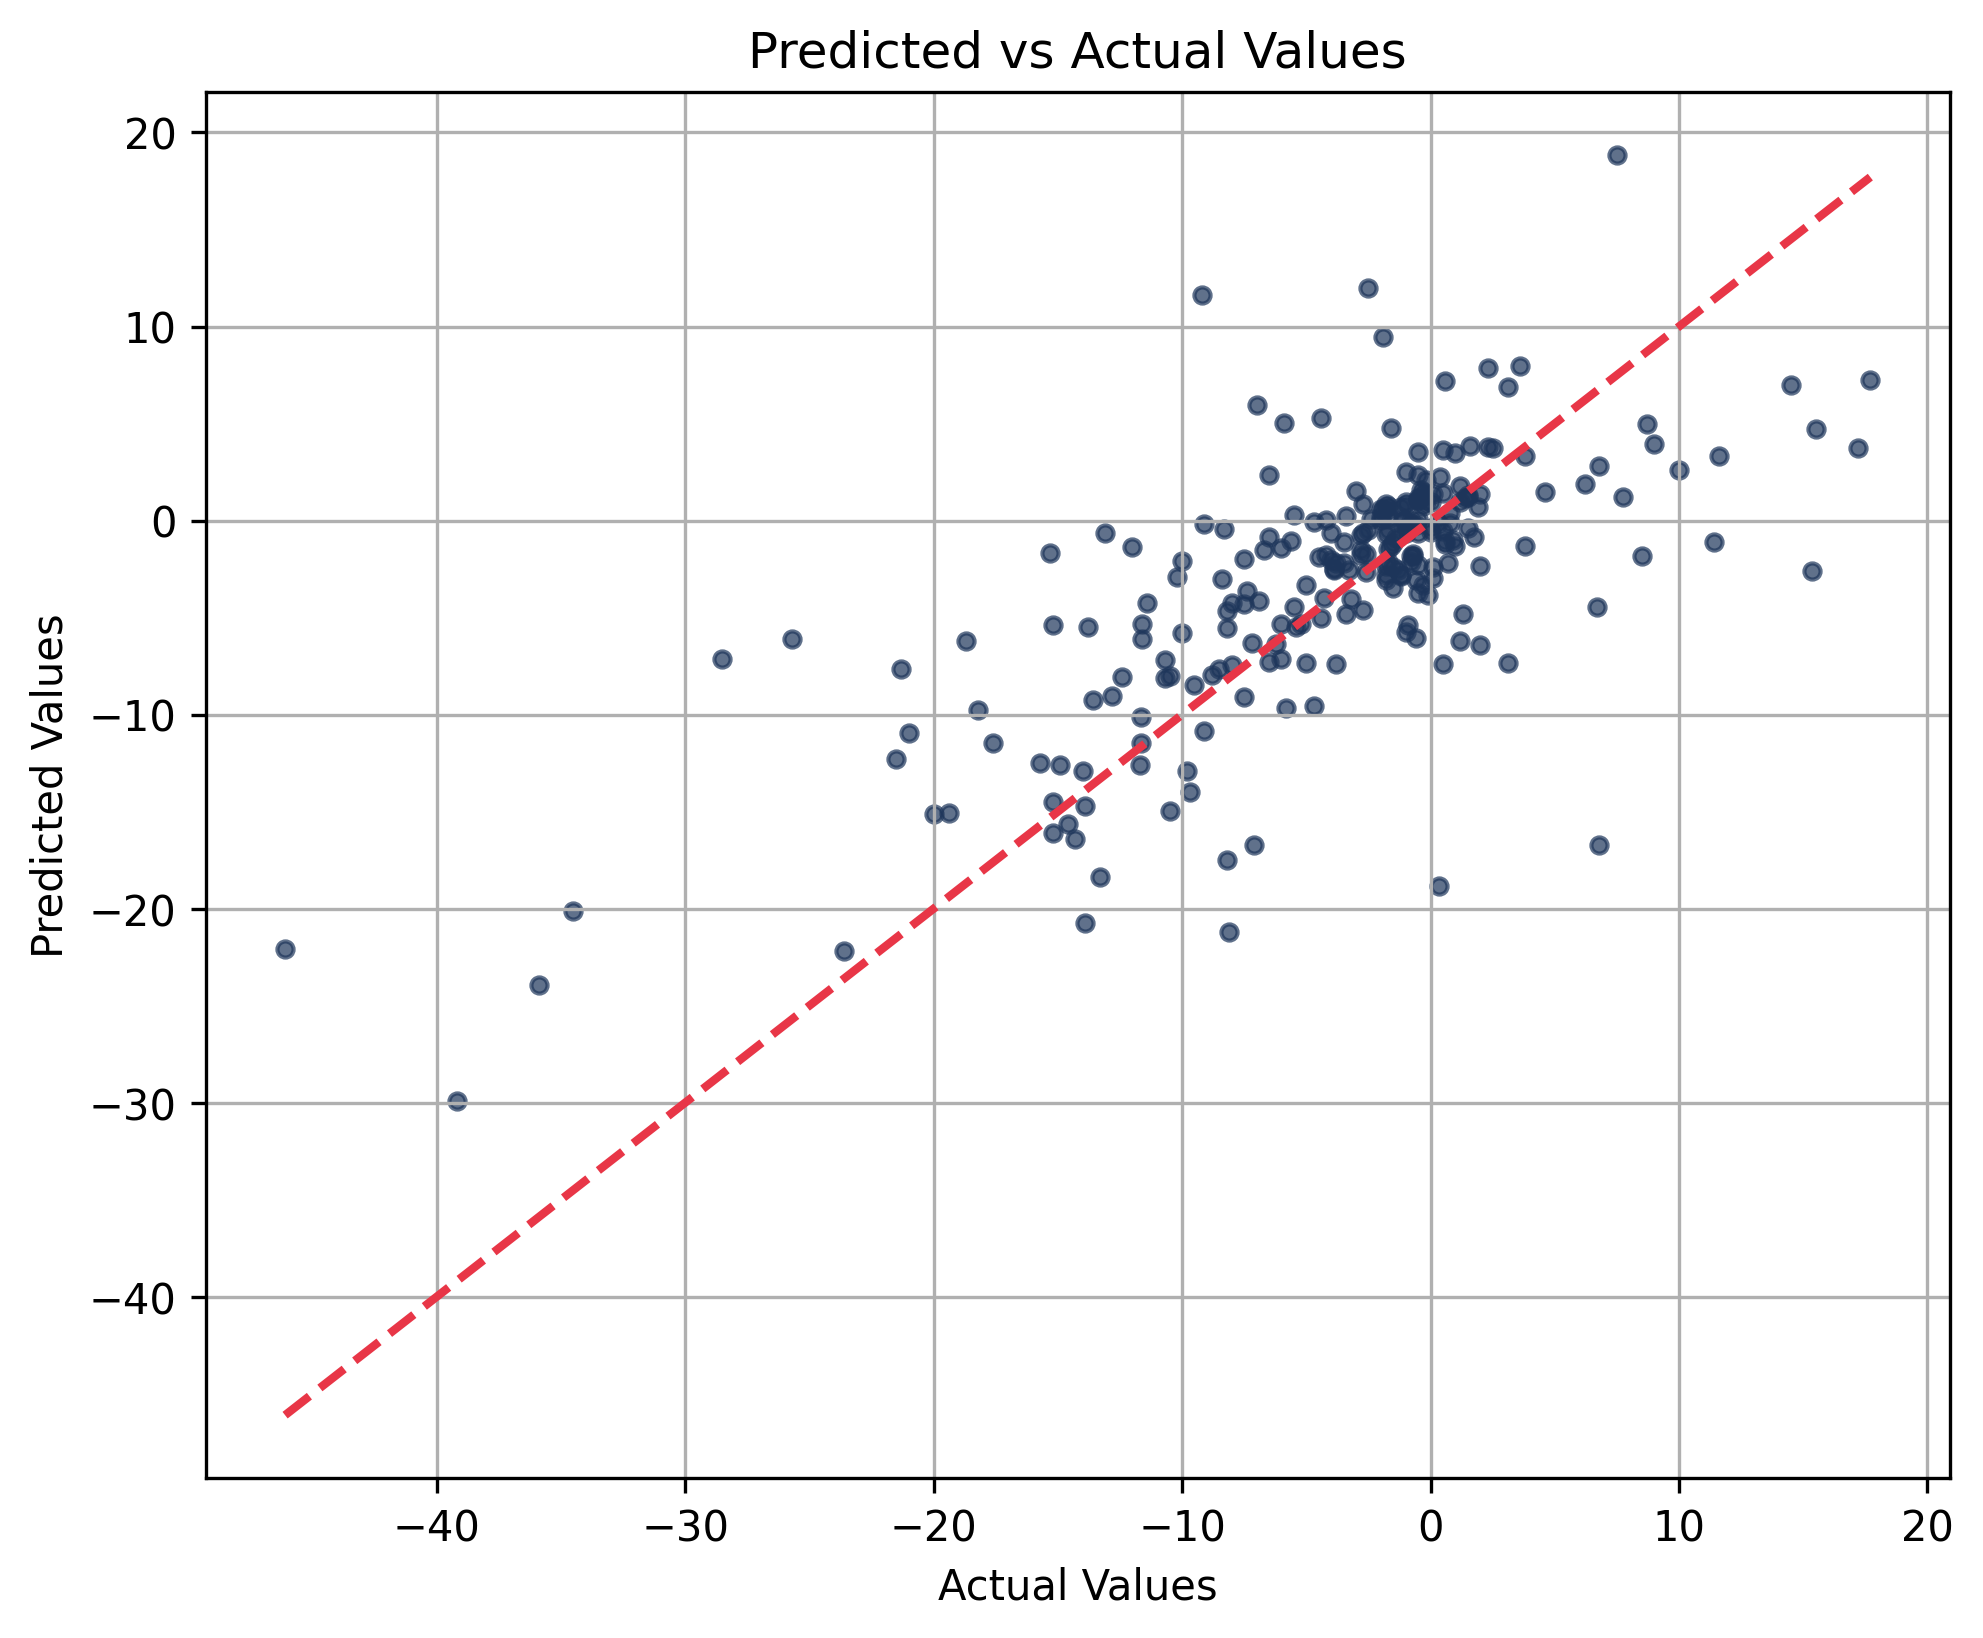

In [17]:
# 创建第一个图：实际值 vs 预测值
plt.figure(figsize=(7.5, 6), dpi=300)
plt.scatter(y_test, y_pred, alpha=0.7, color="#1d355a", s=15)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="#e83647", linestyle="--", lw=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

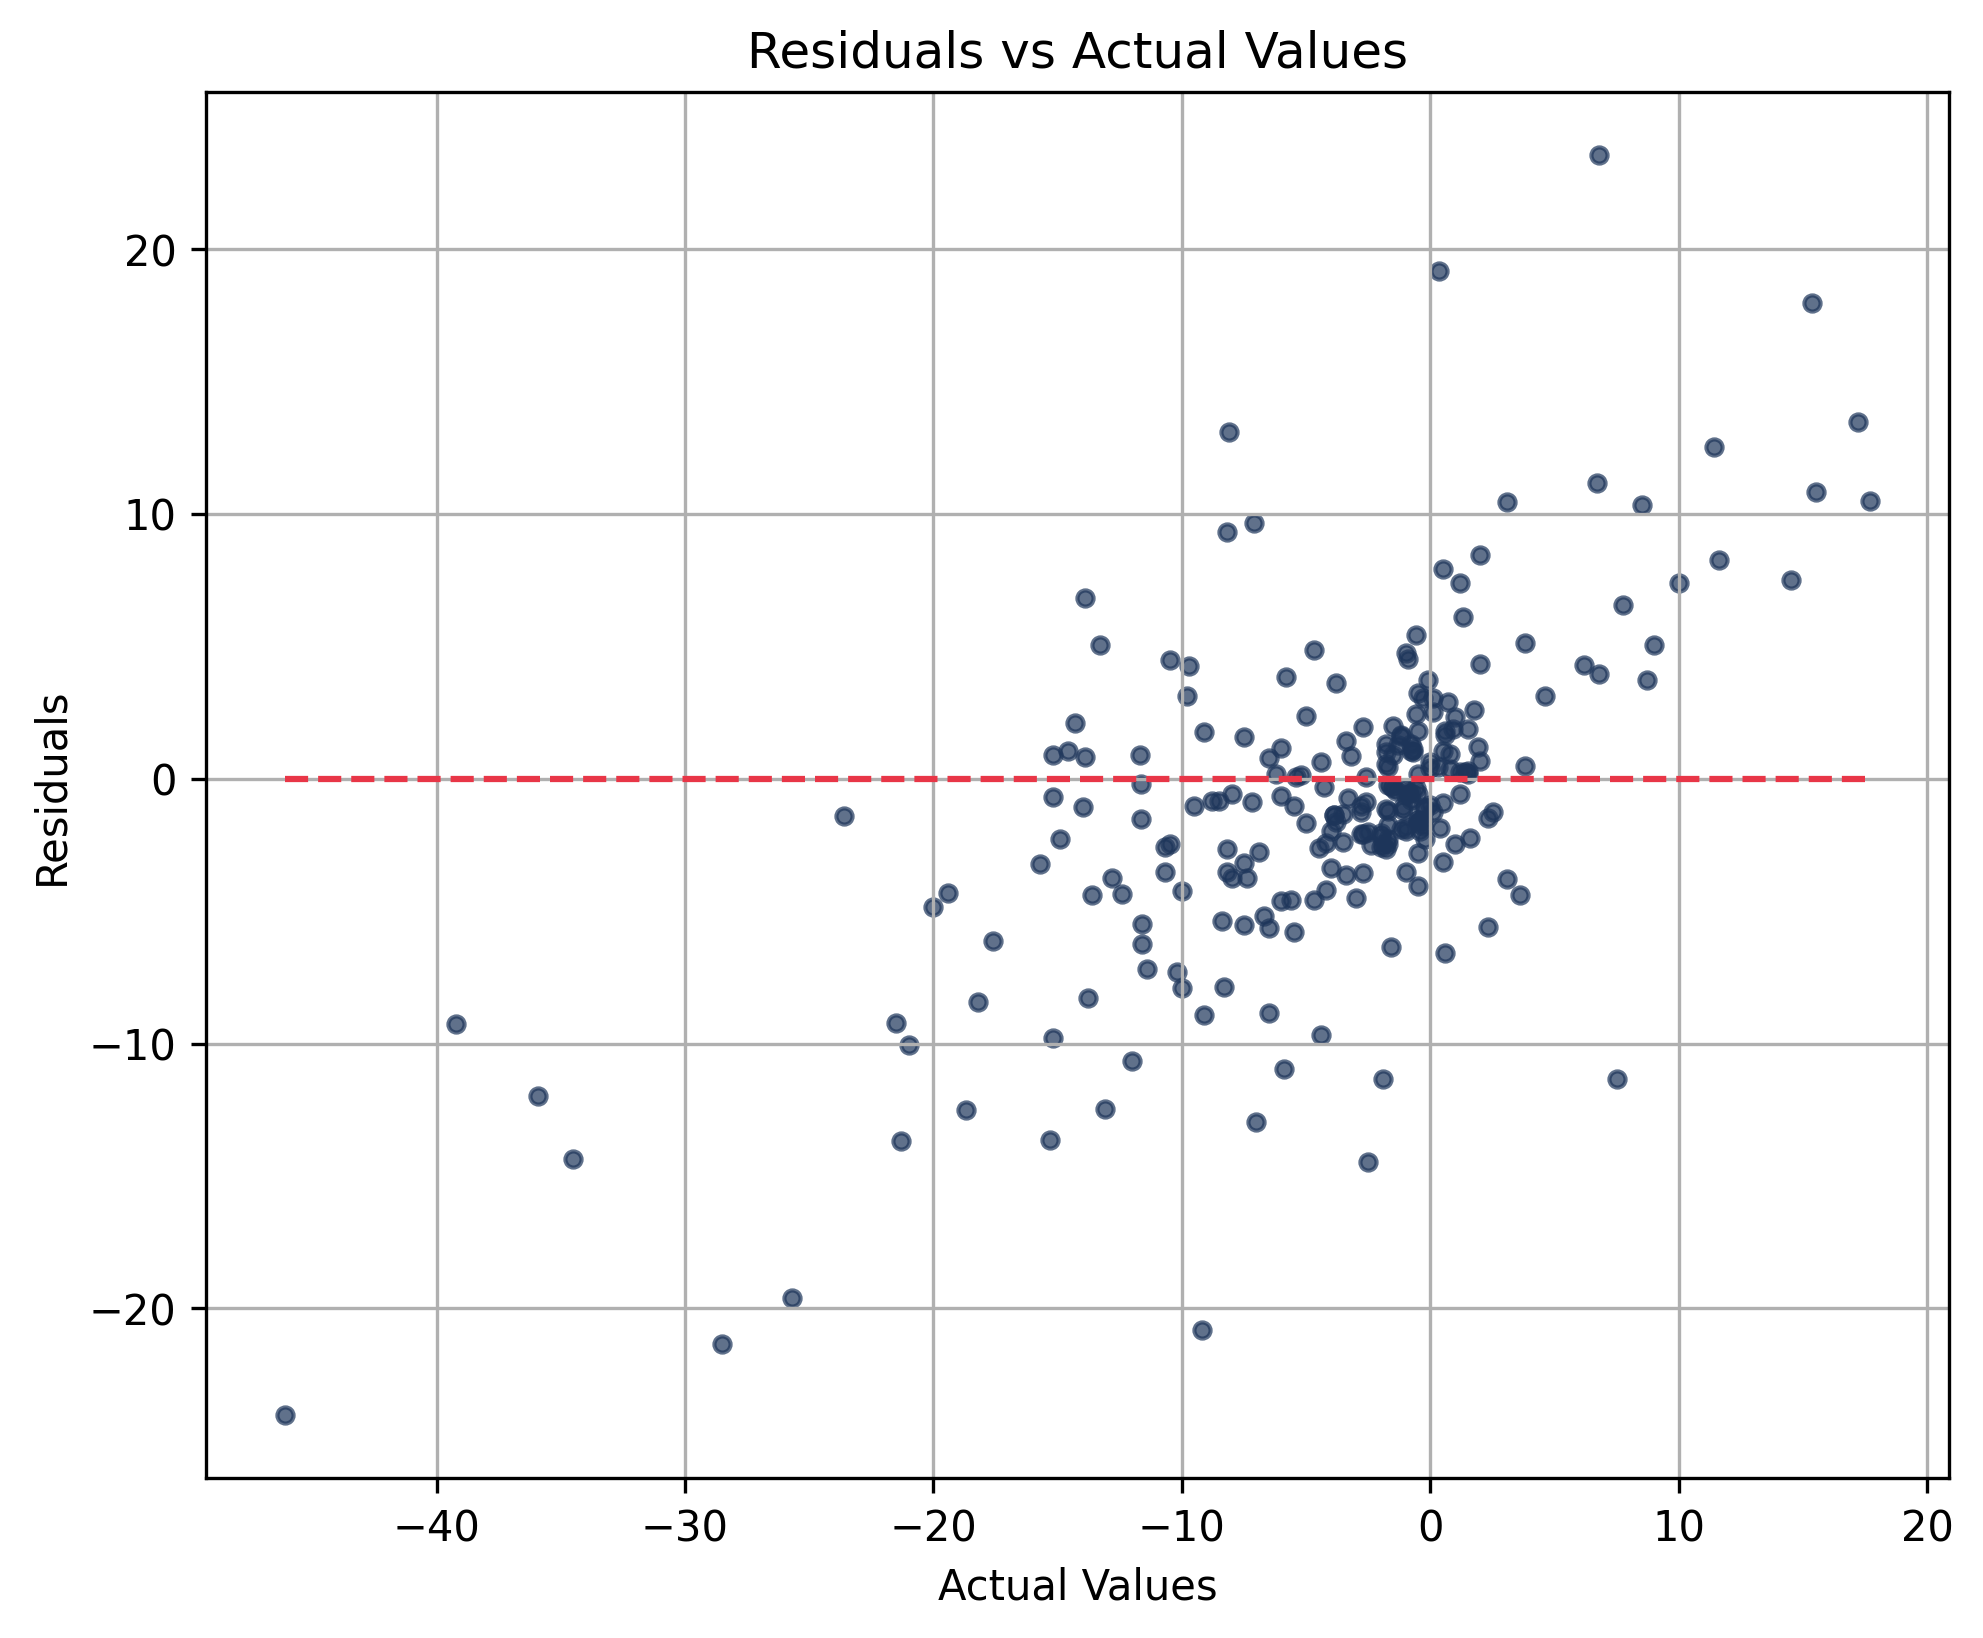

In [18]:
# 创建第二个图：残差 vs 预测值
plt.figure(figsize=(7.5, 6), dpi=300)
plt.scatter(y_test, y_residuals, alpha=0.7, color="#1d355a", s=15)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors="#e83647", linestyles='dashed')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

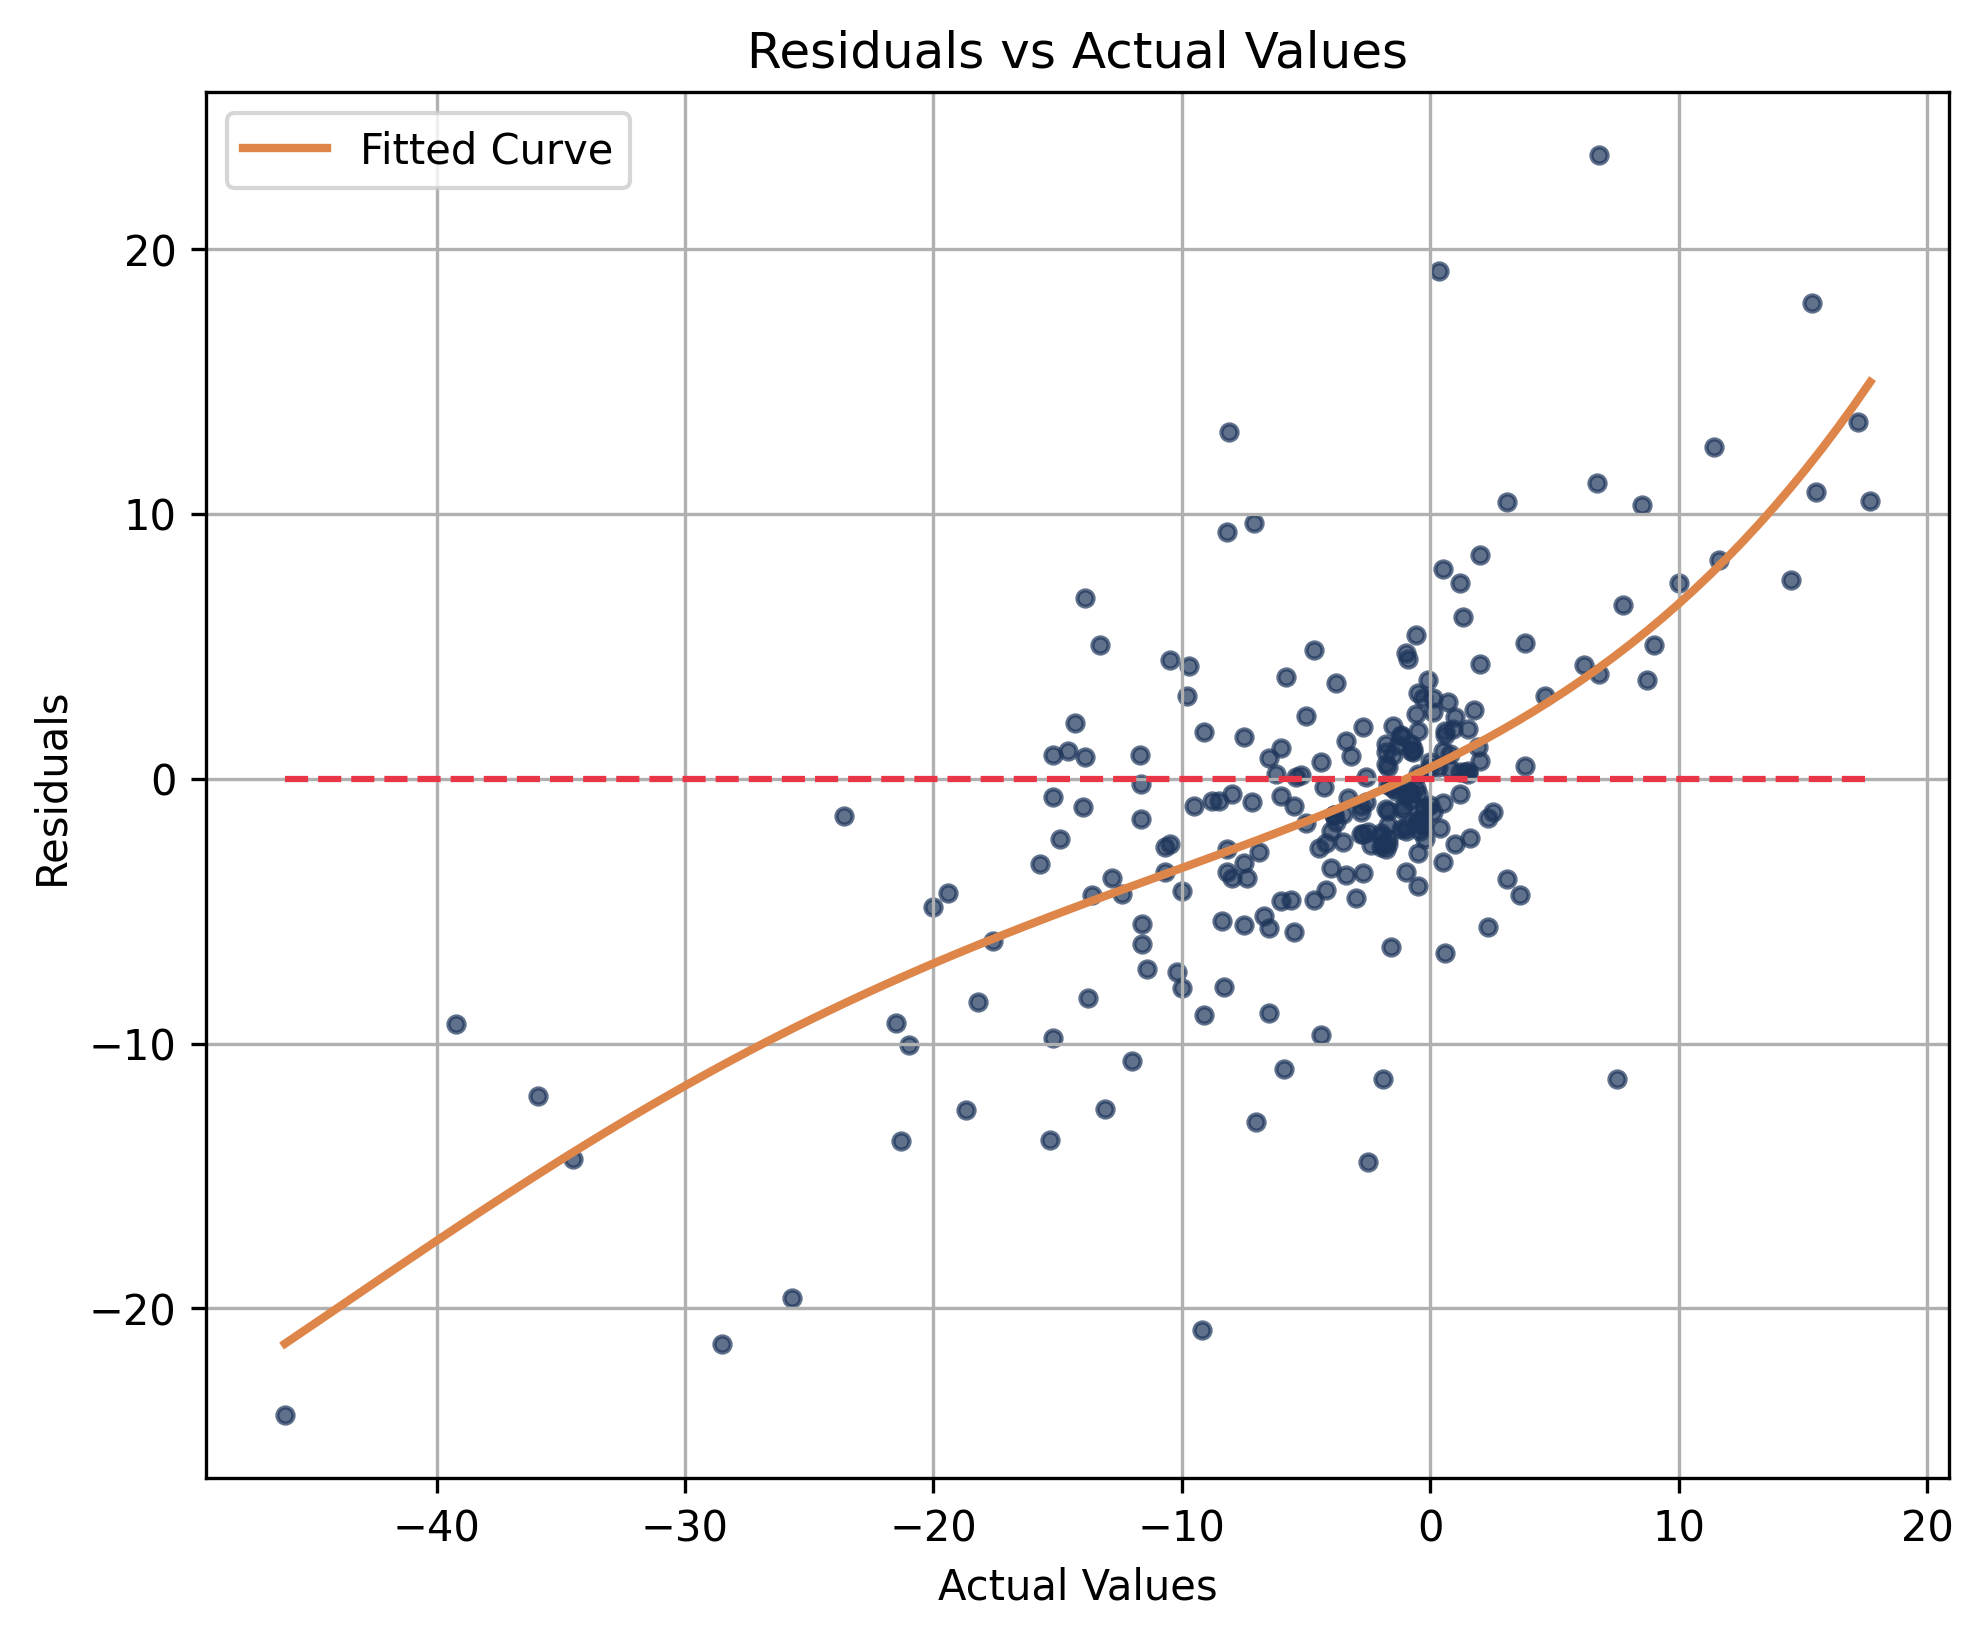

In [21]:
# 假设 y_residuals 和 y_test 是你的残差和实际值
# 生成散点图
plt.figure(figsize=(7.5, 6), dpi=300)
plt.scatter(y_test, y_residuals, alpha=0.7, color="#1d355a", s=15)

# 拟合曲线
coefficients = np.polyfit(y_test, y_residuals, deg=4)  # 二次多项式拟合
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(min(y_test), max(y_test), 100)
y_fit = polynomial(x_fit)

# 绘制拟合曲线
plt.plot(x_fit, y_fit, color="#de8549", linestyle='-', linewidth=2, label='Fitted Curve')

# 绘制零残差线
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors="#e83647", linestyles='dashed')

# 添加标题、标签和图例
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

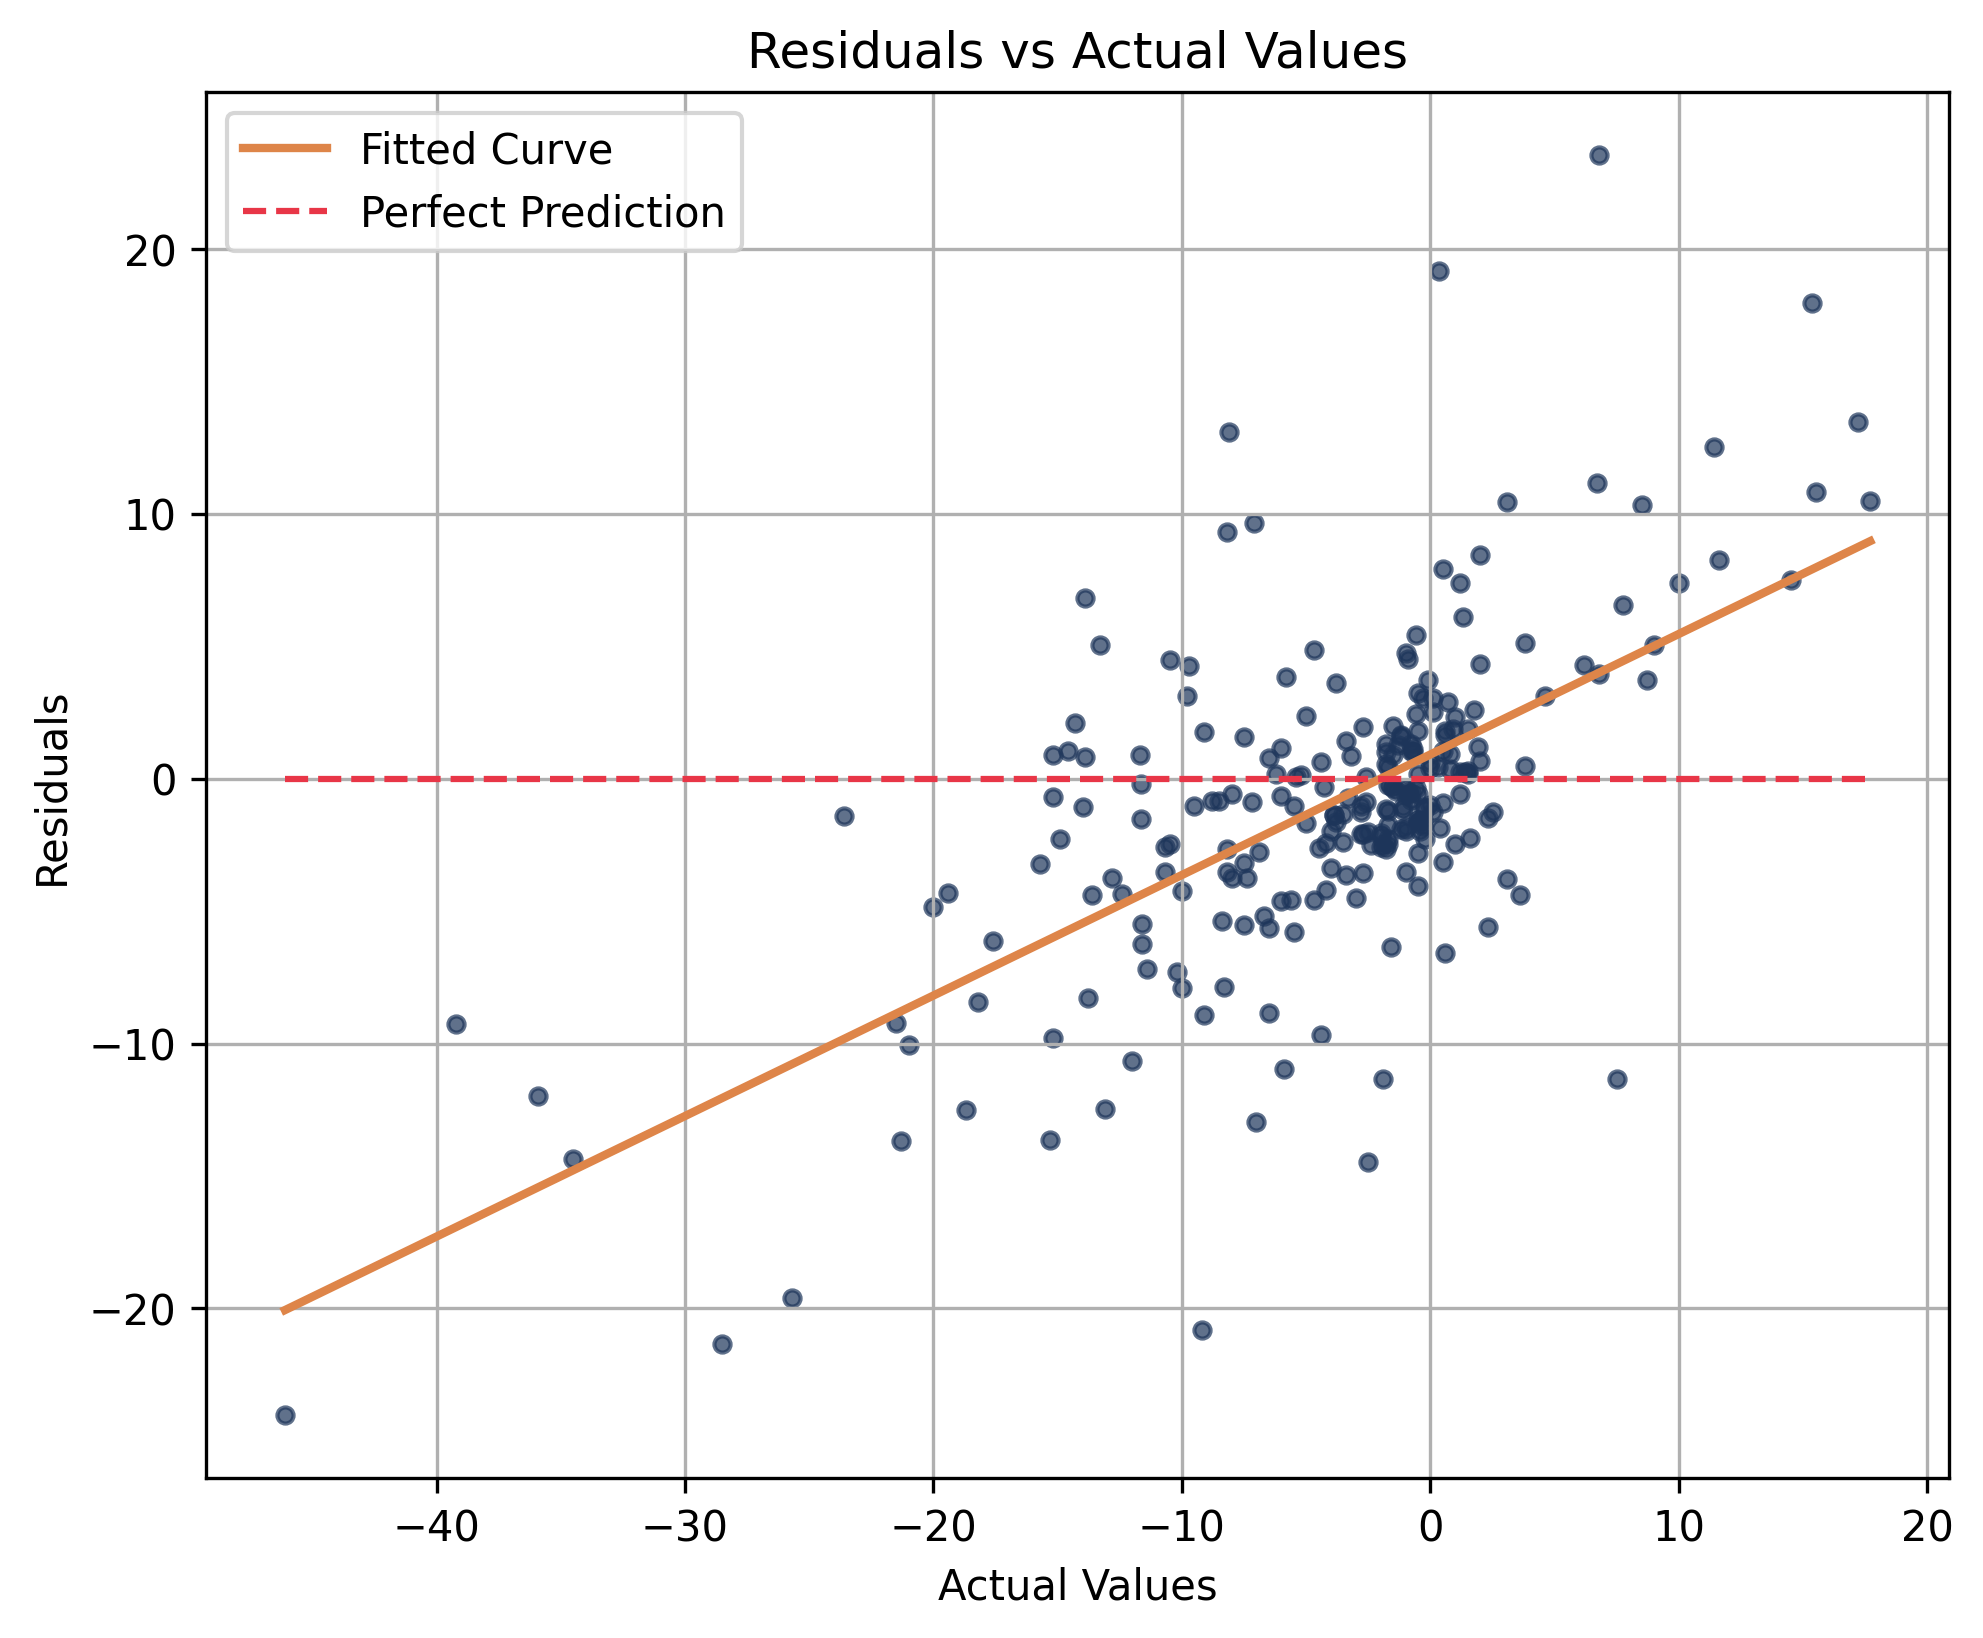

In [24]:
# 假设 y_residuals 和 y_test 是你的残差和实际值
# 生成散点图
plt.figure(figsize=(7.5, 6), dpi=300)
plt.scatter(y_test, y_residuals, alpha=0.7, color="#1d355a", s=15)

# 拟合曲线
coefficients = np.polyfit(y_test, y_residuals, deg=1)  # 二次多项式拟合
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(min(y_test), max(y_test), 100)
y_fit = polynomial(x_fit)

# 绘制拟合曲线
plt.plot(x_fit, y_fit, color="#de8549", linestyle='-', linewidth=2, label='Fitted Curve')

# 绘制零残差线
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors="#e83647", linestyles='dashed', 
           label='Perfect Prediction')

# 添加标题、标签和图例
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import scipy.stats
# 计算 MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# 计算 RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 计算 PCC
pcc, _ = scipy.stats.pearsonr(y_test, y_pred)
print(f'Pearson Correlation Coefficient (PCC): {pcc}')

# 计算 R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

Mean Absolute Error (MAE): 4.1845548373676165
Root Mean Squared Error (RMSE): 6.149900909702259
Pearson Correlation Coefficient (PCC): 0.697856973341116
R²: 0.4661054949844631


In [29]:
from scipy.stats import pearsonr

# 计算 Pearson 相关系数和 p-value
correlation, p_value = pearsonr(y_test, y_pred)

# 打印结果
print(f"Pearson 相关系数: {correlation}")
print(f"p-value: {p_value}")

Pearson 相关系数: 0.697856973341116
p-value: 8.581238985467271e-37
